# Maninder Maan
## 102153010

## Importing Necessary Files

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
train_df = pd.read_csv("/content/Creditcard_data.csv")

In [60]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
# dropping time as not neccesary
train_df = train_df.drop('Time' , axis = 1)

In [62]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Making Dependent and Independent Features

In [63]:
X = train_df.iloc[: , :-1]
y = train_df.iloc[: , -1]

In [64]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [65]:
y.value_counts()

0    763
1      9
Name: Class, dtype: int64

## Visualization

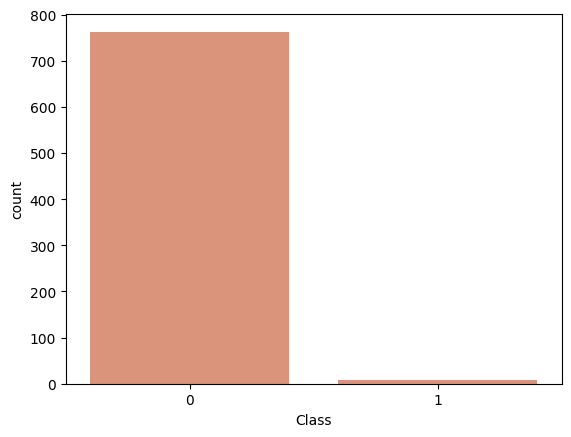

In [49]:
# we can see that either we have to do upsampling of 1 or downsampling of 0
sns.countplot(x=y);

## Sampling -> Up / Down

In [50]:
# Upsample using SMOTE
smote = SMOTE(random_state=42)
X_upsampled_smote, y_upsampled_smote = smote.fit_resample(X, y)

# Downsample using RandomUnderSampler (default is majority class)
rus = RandomUnderSampler(random_state=42)
X_downsampled_smote, y_downsampled_smote = rus.fit_resample(X, y)

In [73]:
# Separating independent features (X) and dependent feature (y)
X_original = train_df.drop('Class', axis=1)
y_original = train_df['Class']

# Apply RandomOverSampler
X_randomoversampler, y_randomoversampler = RandomOverSampler().fit_resample(X_original, y_original)

# Apply SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_original, y_original)

# Apply ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_original, y_original)

# Apply RandomUnderSampler
X_randomundersampler, y_randomundersampler = RandomUnderSampler().fit_resample(X_original, y_original)

# Print the shapes of the sampled datasets
print("Original Data Shape:", X_original.shape, y_original.shape)
print("RandomOverSampler Shape:", X_randomoversampler.shape, y_randomoversampler.shape)
print("SMOTE Shape:", X_smote.shape, y_smote.shape)
print("ADASYN Shape:", X_adasyn.shape, y_adasyn.shape)
print("RandomUnderSampler Shape:", X_randomundersampler.shape, y_randomundersampler.shape)

Original Data Shape: (772, 29) (772,)
RandomOverSampler Shape: (1526, 29) (1526,)
SMOTE Shape: (1526, 29) (1526,)
ADASYN Shape: (1529, 29) (1529,)
RandomUnderSampler Shape: (18, 29) (18,)


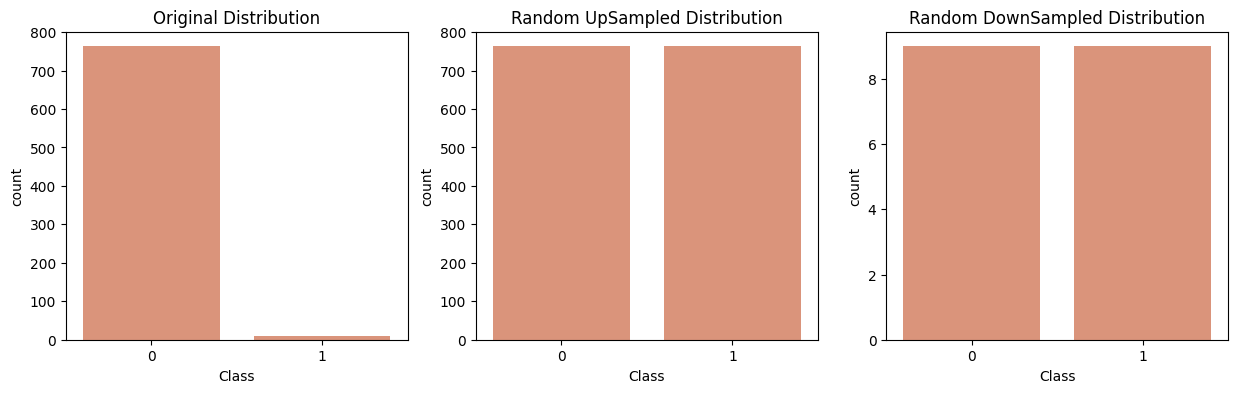

In [51]:
plt.subplots(1,3,figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(x=y);
plt.title("Original Distribution")

plt.subplot(1,3,2);
sns.countplot(x=y_upsampled_smote);
plt.title("Random UpSampled Distribution")

plt.subplot(1,3,3);
sns.countplot(x=y_downsampled_smote);
plt.title("Random DownSampled Distribution")
plt.show();

## Making models

In [52]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbose=-1)
gb = GradientBoostingClassifier()

## Training and Testing

### 1. Orignal

In [53]:
# Train test classifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.32 , random_state = 44)

# Training the models
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("Accuracy of RF Original:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN Original:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB Original:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB Original:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM Original:",accuracy_score(lgbm.predict(X_test),y_test))

Accuracy of RF Original: 0.9919354838709677
Accuracy of KNN Original: 0.9919354838709677
Accuracy of GB Original: 0.9919354838709677
Accuracy of XGB Original: 0.9879032258064516
Accuracy of LGBM Original: 0.9919354838709677


## 2. UpSampled

In [54]:
# Train test classifier
X_train, X_test, y_train, y_test = train_test_split(X_upsampled_smote,y_upsampled_smote, test_size=0.32 , random_state = 44)

# Training the models
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("Accuracy of RF UpSampled:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN UpSampled:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB UpSampled:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB UpSampled:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM UpSampled:",accuracy_score(lgbm.predict(X_test),y_test))

Accuracy of RF UpSampled: 0.9856850715746421
Accuracy of KNN UpSampled: 0.9059304703476483
Accuracy of GB UpSampled: 0.9938650306748467
Accuracy of XGB UpSampled: 0.9959100204498977
Accuracy of LGBM UpSampled: 0.9877300613496932


## 3. DownSampled

In [55]:
# Train test classifier
X_train, X_test, y_train, y_test = train_test_split(X_downsampled_smote,y_downsampled_smote, test_size=0.32 , random_state = 44)

# Training the models
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("Accuracy of RF DownSampled:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN DownSampled:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB DownSampled:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB DownSampled:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM DownSampled:",accuracy_score(lgbm.predict(X_test),y_test))

Accuracy of RF DownSampled: 0.6666666666666666
Accuracy of KNN DownSampled: 0.8333333333333334
Accuracy of GB DownSampled: 0.8333333333333334
Accuracy of XGB DownSampled: 0.8333333333333334
Accuracy of LGBM DownSampled: 0.5
